In [1]:
# Define parameters to run the notebook here
C = 0.015
Gc = 0.1
ggap = 0.875
gsyn = 1.5

# Limit cycle. Oscillation is seen.
"""
C = 0.015
Gc = 0.1
ggap = 1.0
gsyn = 1.50

Elapsed time: 3.71s
Dominant period: 2.00
Dimensionality: 1.53
Dominant amplitude: 230.41
Dominant amplitude convergence: 1.00
"""

# Focus. The amplitude keeps decreasing.
"""
C = 0.002
Gc = 0.7
ggap = 1.0
gsyn = 1.0

Elapsed time: 0.85s
Dominant period: 4.99
Dimensionality: 1.91
Dominant amplitude: 0.02
Dominant amplitude convergence: 0.62
"""

# Not sure what this is. It's like oscillation, but the oscillations
# also oscillate at a higher scale. I think this means there is a high-D limit cycle?
"""
C = 0.015
Gc = 0.1
ggap = 0.875
gsyn = 1.5

"""

'\nC = 0.015\nGc = 0.1\nggap = 0.875\ngsyn = 1.5\n\n'

# Run simulation

In [2]:
import numpy as np
import pandas as pd
import time
from neural_model import NeuralModel
from simulation_functions import *
from sklearn.decomposition import PCA
from util.analysis_util import *
from util.neuron_metadata import *
from util.plot_util import *

neuron_metadata_collection = NeuronMetadataCollection.load_from_chem_json('data/chem.json')

start_time = time.time()
all_dynamics = simulate_until_stable(C, Gc, ggap, gsyn)
elapsed_time = time.time() - start_time

Simulation length 1000.00, raw amplitude diff 3936.04, scaled amplitude diff 44.25, amplitude 44.25
Simulation length 2000.00, raw amplitude diff 20.47, scaled amplitude diff 0.11, amplitude 0.11
Simulation length 4000.00, raw amplitude diff 16.16, scaled amplitude diff 0.10, amplitude 0.10
Simulation length 8000.00, raw amplitude diff 49.45, scaled amplitude diff 0.25, amplitude 0.25
Simulation length 16000.00, raw amplitude diff 6.15, scaled amplitude diff 0.04, amplitude 0.04


# Simulation key statistics

In [4]:
last_n = 1000
n = all_dynamics.shape[0]
last_dynamics = all_dynamics[-last_n:,:]
pca = PCA()

# Perform mean-centering before PCA
X = last_dynamics - last_dynamics.mean(axis= 0)
projected_X = pca.fit_transform(last_dynamics)
dom_mode = projected_X[:,0]
dom_amplitude = get_amplitude(dom_mode)
dom_amplitude_diff_raw, dom_amplitude_diff_scaled = get_amplitude_differences(dom_mode)
dom_period = get_period(dom_mode)

eigen_vals = get_eigenvalues_from_pca(pca, last_n)
dimensionality = get_dimensionality(eigen_vals)
print("Elapsed time: {0:.2f}s".format(elapsed_time))
print("Dominant period: {0:.2f}".format(dom_period))
print("Dominant amplitude: {0:.2f}".format(dom_amplitude))
print("Dominant amplitude diff raw: {0:.2f}".format(dom_amplitude_diff_raw))
print("Dominant amplitude diff scaled: {0:.2f}".format(dom_amplitude_diff_scaled))
print("Dimensionality: {0:.2f}".format(dimensionality))

Elapsed time: 0.02s
Dominant period: 9.98
Dominant amplitude: 252.47
Dominant amplitude diff raw: 4.29
Dominant amplitude diff scaled: 0.03
Dimensionality: 2.47


# Simulation summarized dynamics

Text(0.5, 1.0, 'Top 2 PCs on entire run')

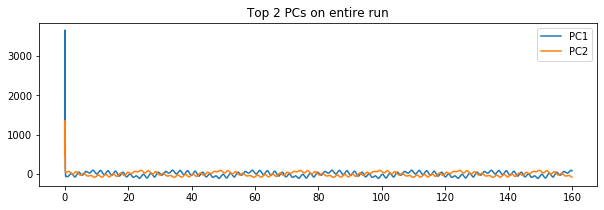

In [5]:
all_X = all_dynamics - all_dynamics.mean(axis= 0)
projected_all_X = pca.fit_transform(all_dynamics)
times = np.arange(0, n * 0.01 , 0.01)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
ax.plot(times, projected_all_X[:,0], label = "PC1")
ax.plot(times, projected_all_X[:,1], label = "PC2")
ax.legend()
ax.set_title("Top 2 PCs on entire run")

Text(0.5, 1.0, 'Top 2 PCs in the last moments before convergence')

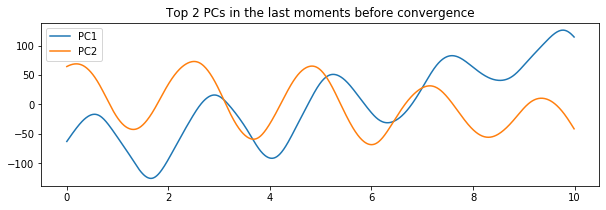

In [6]:
times = np.arange(0, last_n * 0.01 , 0.01)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
ax.plot(times, projected_X[:,0], label = "PC1")
ax.plot(times, projected_X[:,1], label = "PC2")
ax.legend()
ax.set_title("Top 2 PCs in the last moments before convergence")

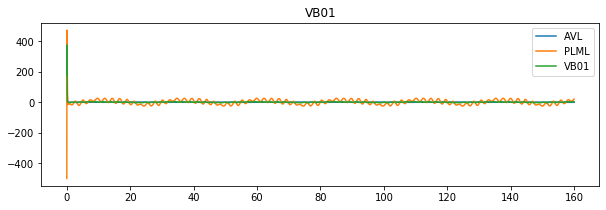

In [7]:
# Plot initial dynamics
# AVL = interneuron. PLML = sensory neuron. VB01 = motor neuron.
_ = plot_saved_dynamics_collapsed(['AVL', 'PLML', 'VB01'], all_dynamics, neuron_metadata_collection)

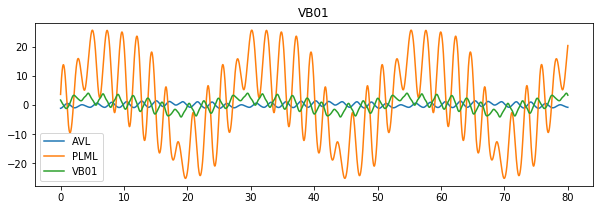

In [8]:
# Plot last half
_ = plot_saved_dynamics_collapsed(['AVL', 'PLML', 'VB01'], all_dynamics[int(-n/2):,], neuron_metadata_collection)